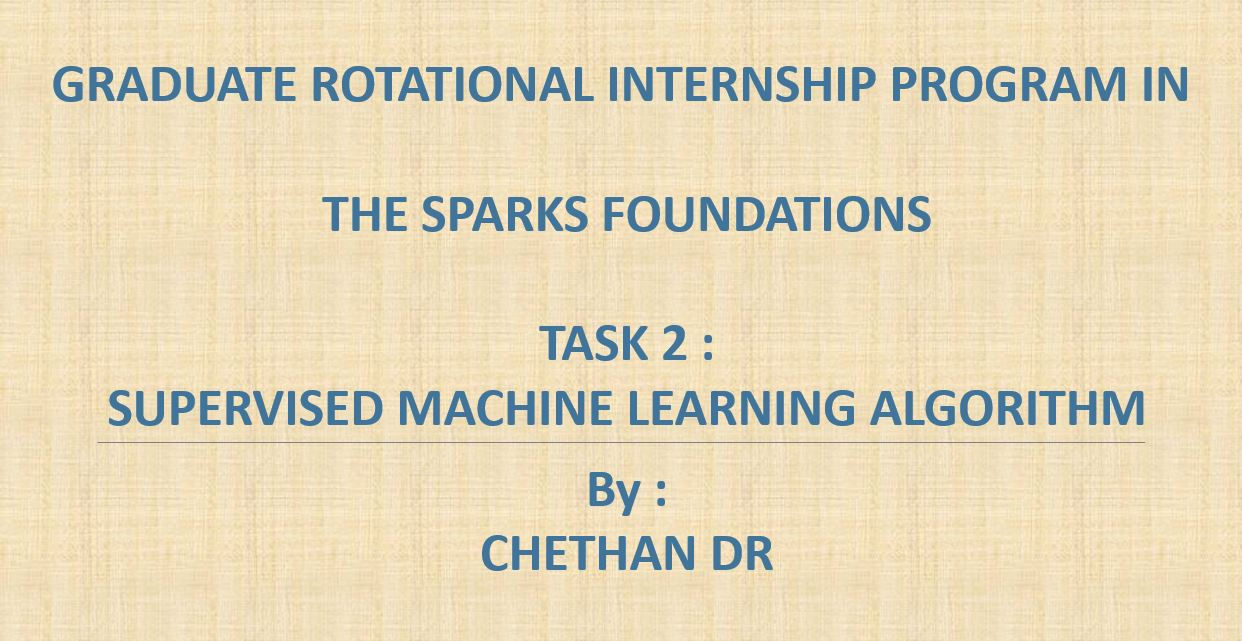

## Task - 2 Simple Linear Regression

Regression gives us the linear relationship of two or more variables within a dataset. We have a dependent variable (or Target variable, y = scores) and has a relationship with independent variable (response variable, x = number of hours).

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



In [2]:
import pandas as pd
import math
import numpy as np
from sklearn import linear_model
import seaborn as sns
import pandas.testing as tm
import matplotlib.pyplot as plt

Found the data set at "http://bit.ly/w-data"


In [3]:
df = pd.read_csv('http://bit.ly/w-data')

In [4]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [5]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [6]:
df.isnull().sum().sum()

0

From the above code, we can say that there is no null values in the given data set

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


From the above interpretation we can say that they are no missing values (non-null values) and Hours and Scores are in proper data types. It is not necessary to impute the data.

In [8]:
print(df.tail())

    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [9]:
corr = df.corr()
print("The correlation is: \n")
print(corr)
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Hours'],df['Scores'])
print("\n pearson_coef \t", pearson_coef, "\n p_value \t",p_value)

The correlation is: 

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

 pearson_coef 	 0.9761906560220884 
 p_value 	 9.132624467460325e-17


The value of Pearson correlation is 0.97 and P - Value is less than 0.001. So we can conclude that there is a strong positive correlation.

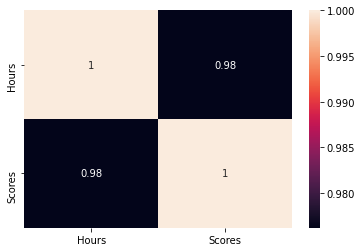

In [10]:
sns.heatmap(corr, annot=True)

Form the above correlation plot we can say that there exists a positive linear relation between the number of hours studied and percentage of score.


Text(0.5, 1.0, 'Marks sccored distribution')

<Figure size 432x288 with 0 Axes>

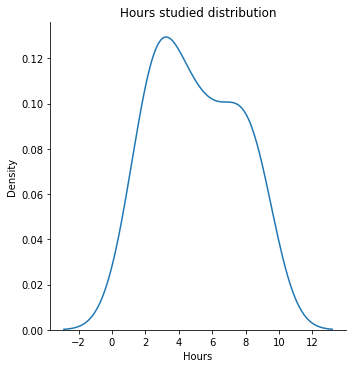

<Figure size 432x288 with 0 Axes>

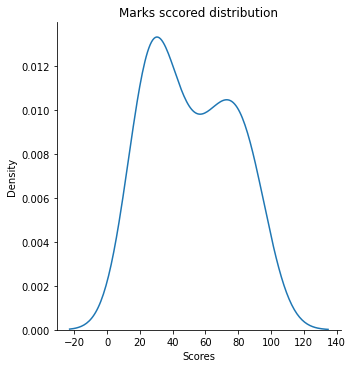

In [11]:
plt.figure()
sns.displot(df["Hours"], kind="kde")
plt.title("Hours studied distribution")
plt.figure()
sns.displot(df["Scores"], kind="kde")
plt.title("Marks sccored distribution")

Text(0.5, 1.0, '\n Linear Relationship Between Hours studied and Marks scored \n ')

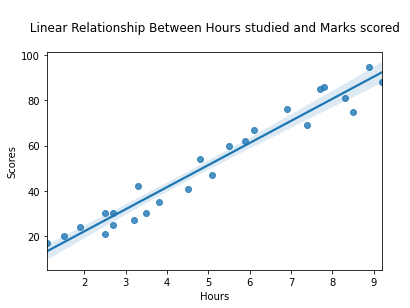

In [25]:
plt.figure()
sns.regplot(x="Hours", y="Scores", data=df)
plt.title("\n Linear Relationship Between Hours studied and Marks scored \n ")

## Training and Testing the Algorithm

In the code below, Split the data into training and test sets. 70 % of the data has been used for training the model and 30 % of the data is used for testing the model.


In [12]:
x = df[['Hours']]
y = df['Scores']

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 
print("Training complete.")

Training complete.


## Making Predictions

We have trained our algorithm, it time to make predictions.

In [14]:
print(x_test)
y_pred = reg.predict(x_test)
y_pred

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

## Comparing Actual v/s Predicted values

In [15]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [26]:
hours = float(input('Enter the total number of hours studied : '))
cls_predict = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Scores for studing total number of hours = {:.3f}%".format(cls_predict[0]))

Enter the total number of hours studied : 9.25
No of Hours = 9.25
Predicted Scores for studing total number of hours = 92.915%


In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
